In [1]:
import joblib
cv, x_train, x_test, y_train, y_test = joblib.load('imdb2.pkl')

In [2]:
import tensorflow as tf
model = tf.keras.models.load_model('imdb-sentiment2.krs')

### 예측

In [3]:
model.predict(x_test.toarray())

array([[0.6990844 ],
       [0.6373324 ],
       [0.9038335 ],
       ...,
       [0.88998574],
       [0.91977274],
       [0.91967404]], dtype=float32)

In [4]:
y_pred = model.predict_classes(x_test.toarray())

### 혼돈행렬

In [7]:
from sklearn.metrics import confusion_matrix

In [8]:
confusion_matrix(y_test, y_pred) 

array([[  33,  207],
       [  18, 1793]], dtype=int64)

### 각종 지표

In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [10]:
accuracy_score(y_test, y_pred)

0.8902974158946855

In [11]:
precision_score(y_test, y_pred)

0.8965

In [12]:
recall_score(y_test, y_pred)

0.9900607399226946

In [13]:
f1_score(y_test, y_pred)

0.9409603778535818

### threshold 조정

In [14]:
probs = model.predict(x_test.toarray()) 

In [15]:
y60 = (probs >= 0.6).astype(int)  

In [16]:
confusion_matrix(y_test, y60)

array([[  61,  179],
       [  37, 1774]], dtype=int64)

In [17]:
y40 = (probs >= 0.4).astype(int)  

In [18]:
confusion_matrix(y_test, y40)

array([[  22,  218],
       [  10, 1801]], dtype=int64)

### ROC-AUC

In [19]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [20]:
fpr, tpr, threshold = roc_curve(y_test, probs)

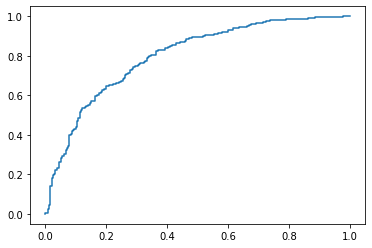

In [21]:
plt.plot(fpr, tpr)

In [22]:
roc_auc_score(y_test, probs)

0.798437787594331